In [40]:
#Import dependencies
import pandas as pd
from pandas import DataFrame
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

import csv
import os
import json
from scipy.stats import linregress


In [41]:
#Get tickers for top 10 TECH companies
tickers = yf.Tickers("AAPL MSFT AMZN GOOG BABA FB INTC NVDA CRM PYPL")
print(tickers)

yfinance.Tickers object <AAPL,MSFT,AMZN,GOOG,BABA,FB,INTC,NVDA,CRM,PYPL>


In [42]:
USA_TechStocks_data = yf.download("AAPL MSFT AMZN GOOG BABA FB INTC NVDA CRM PYPL",start="2019-12-01", end="2020-03-16")

USA_TechStocks_data.index

[*********************100%***********************]  10 of 10 completed


DatetimeIndex(['2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13', '2019-12-16', '2019-12-17',
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
      

In [43]:
#Get only closing data
USA_TechStocks_data_close = USA_TechStocks_data["Close"]
USA_TechStocks_data_close["Date"] = USA_TechStocks_data_close.index

pd.DataFrame(USA_TechStocks_data_close).head()

/Users/Nimmoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AAPL,AMZN,BABA,CRM,FB,GOOG,INTC,MSFT,NVDA,PYPL,Date
Date,,,,,,,,,,,
2019-12-02,264.160004,1781.599976,196.309998,161.000000,199.699997,1289.920044,57.660000,149.550003,209.250000,106.209999,2019-12-02
2019-12-03,259.450012,1769.959961,194.899994,161.570007,198.820007,1295.280029,56.070000,149.309998,207.660004,105.589996,2019-12-03
2019-12-04,261.739990,1760.689941,193.740005,156.429993,198.710007,1320.540039,56.020000,149.850006,209.419998,105.000000,2019-12-04
2019-12-05,265.579987,1740.479980,200.000000,158.220001,199.360001,1328.130005,56.080002,149.929993,208.740005,104.589996,2019-12-05
2019-12-06,270.709991,1751.599976,201.889999,158.009995,201.050003,1340.619995,56.810001,151.750000,212.169998,104.339996,2019-12-06


In [44]:
# Dropping the unnecessary date column at the end

USA_TechStocks_data_close_plot= USA_TechStocks_data_close.drop("Date", axis = 1)


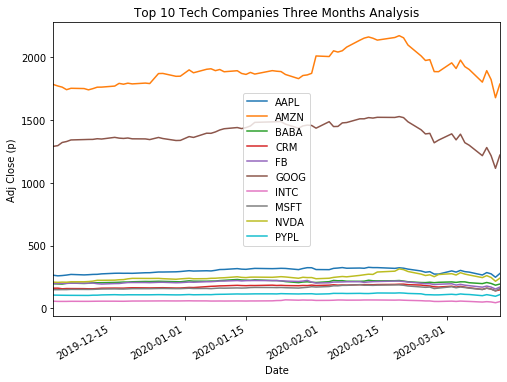

In [45]:

#Plotting the Line chart aesthetics
USA_TechStocks_data_close_plot.plot(kind = "line",figsize=(8,6))

plt.xlabel("Date")
plt.ylabel("Adj Close (p)")
plt.legend()
plt.title("Top 10 Tech Companies Three Months Analysis")
plt.show()




/Users/Nimmoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


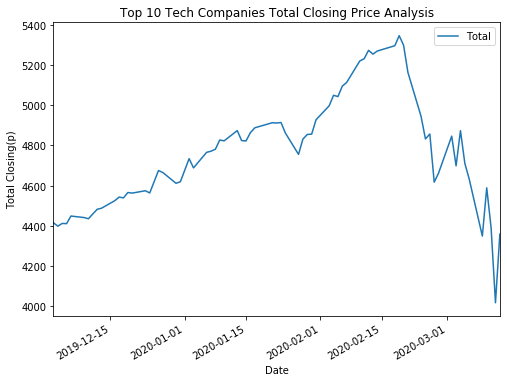

In [60]:

# Adding up the above closing stocks to get the total closing stocks for the day
USA_TechStocks_data_close["Total"] = USA_TechStocks_data_close["AAPL"] + USA_TechStocks_data_close["MSFT"] + USA_TechStocks_data_close["AMZN"]+USA_TechStocks_data_close["GOOG"] + USA_TechStocks_data_close["BABA"] + USA_TechStocks_data_close["FB"] + USA_TechStocks_data_close["INTC"]+USA_TechStocks_data_close["NVDA"]+USA_TechStocks_data_close["CRM"]+ USA_TechStocks_data_close["PYPL"]

# Making the plot and aesthetics

USA_TechStocks_data_close.plot(y = "Total",kind = "line",figsize=(8,6))

plt.xlabel("Date")
plt.ylabel("Total Closing(p)")
plt.legend()
plt.title("Top 10 Tech Companies Total Closing Price Analysis")
plt.show()


In [47]:
# Importing COVID-19 Confirmed cases data to compare with the Tech Stcoks decline

# COVID-19 CSV Reading

Confirmed_cases_file = ("Resources/confirmed_cases.csv")
Confirmed_cases_data = pd.read_csv(Confirmed_cases_file)
Confirmed_cases_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566


In [48]:
# sum(Confirmed_cases_data.sum().tolist()[2:])
# Confirmed_cases_data.sum().tolist()[2:]

# Confirmed_cases_data_sum_reduced =Confirmed_cases_data.sum().tolist()[2:]
# Confirmed_cases_data_sum_reduced



In [49]:
 # listing the columns in the above df
Confirmed_cases_data.columns


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20'],
      dtype='object')

In [50]:
# removed the columns for Country/Region, Lat and, Long

Confirmed_cases_data_months= Confirmed_cases_data[['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20']]
Confirmed_cases_data_months

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,2,3,5,7,8,8,14,14,14,19,...,50,50,50,53,59,70,75,82,114,147
1,2,1,2,2,4,4,7,7,11,15,...,461,502,511,581,639,639,701,773,839,825
2,0,1,3,3,4,5,7,7,10,13,...,138,150,150,160,178,178,200,212,226,243
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,93,99,117,129,149,149,197,238,428,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [51]:
# Getting the Total confirmed cases for the each day globally
Confirmed_cases_data_sum = pd.DataFrame({"Total":Confirmed_cases_data_months.sum()})



In [52]:
Confirmed_cases_data_sum["Date1"]=Confirmed_cases_data_sum.index
Confirmed_cases_data_sum["Date1"]=pd.to_datetime(Confirmed_cases_data_sum["Date1"])


In [53]:
Confirmed_cases_data_sum.head()

,Total,Date1
1/22/20,555,2020-01-22
1/23/20,653,2020-01-23
1/24/20,941,2020-01-24
1/25/20,1434,2020-01-25
1/26/20,2118,2020-01-26


In [54]:
# Renaming the Date columns for tech stocks data

USA_TechStocks_data_close["Date1"] = USA_TechStocks_data_close["Date"]

#Merging the Tech stock analysis with those of Total COVID-19 Confirmed cases

combined_data = pd.merge(Confirmed_cases_data_sum ,USA_TechStocks_data_close, how = "inner", on ="Date1")

combined_data.head()




/Users/Nimmoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Total_x,Date1,AAPL,AMZN,BABA,CRM,FB,GOOG,INTC,MSFT,NVDA,PYPL,Date,Total_y
0,555,2020-01-22,317.700012,1887.459961,222.369995,182.750000,221.320007,1485.949951,62.730000,165.699997,250.110001,115.500000,2020-01-22,4911.589924
1,653,2020-01-23,319.230011,1884.579956,219.130005,183.979996,219.759995,1486.650024,63.320000,166.720001,252.860001,117.889999,2020-01-23,4914.119987
2,941,2020-01-24,318.309998,1861.640015,213.750000,182.110001,217.940002,1466.709961,68.470001,165.039993,250.479996,116.980003,2020-01-24,4861.429970
3,2927,2020-01-27,308.950012,1828.339966,205.470001,180.710007,214.869995,1433.900024,65.690002,162.279999,240.199997,115.239998,2020-01-27,4755.650002
4,5578,2020-01-28,317.690002,1853.250000,210.229996,182.850006,217.789993,1452.560059,67.309998,165.460007,247.970001,116.519997,2020-01-28,4831.630058


In [55]:
# Selecting only the columns we need from above DataFrame

select_combined_data = combined_data.loc[:,["Total_x","Date1","Total_y"]]


#Renaming the selected columns 
                                         
select_combined_data_renamed = combined_data.rename(columns = {"Total_x":"Total_COVID_Cases", "Total_y":"Total_Stock_Price"})

# DataFrame showing only the selected renamed columns
select_combined_data_renamed=select_combined_data.rename(columns = {"Total_x":"Total_COVID_Cases", "Total_y":"Total_Stock_Price"})
select_combined_data_renamed.head()

,Total_COVID_Cases,Date1,Total_Stock_Price
0,555,2020-01-22,4911.589924
1,653,2020-01-23,4914.119987
2,941,2020-01-24,4861.429970
3,2927,2020-01-27,4755.650002
4,5578,2020-01-28,4831.630058


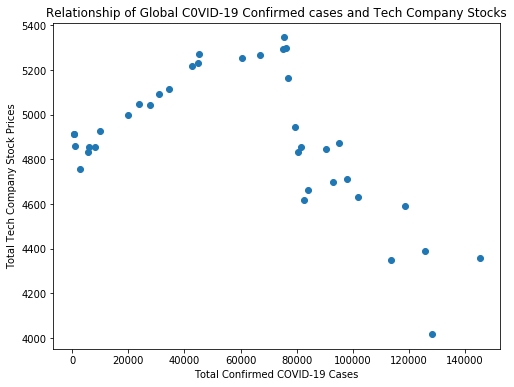

In [59]:
# Generating a scatter plot for the two combined data sets

x = combined_data["Total_x"]
y = combined_data["Total_y"]
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.xlabel('Total Confirmed COVID-19 Cases')
plt.ylabel('Total Tech Company Stock Prices')
plt.title('Relationship of Global C0VID-19 Confirmed cases and Tech Company Stocks')
plt.show()


In [57]:
# calculating and printing the Correlation Relationship between total COVID-19 cases and Tech stocks

correlation = st.pearsonr(x,y)
print(f"The correlation between total global COVID-19 cases and total Tech  Stocks is {round(correlation[0],2)}")




The correlation between total global COVID-19 cases and total Tech  Stocks is -0.49


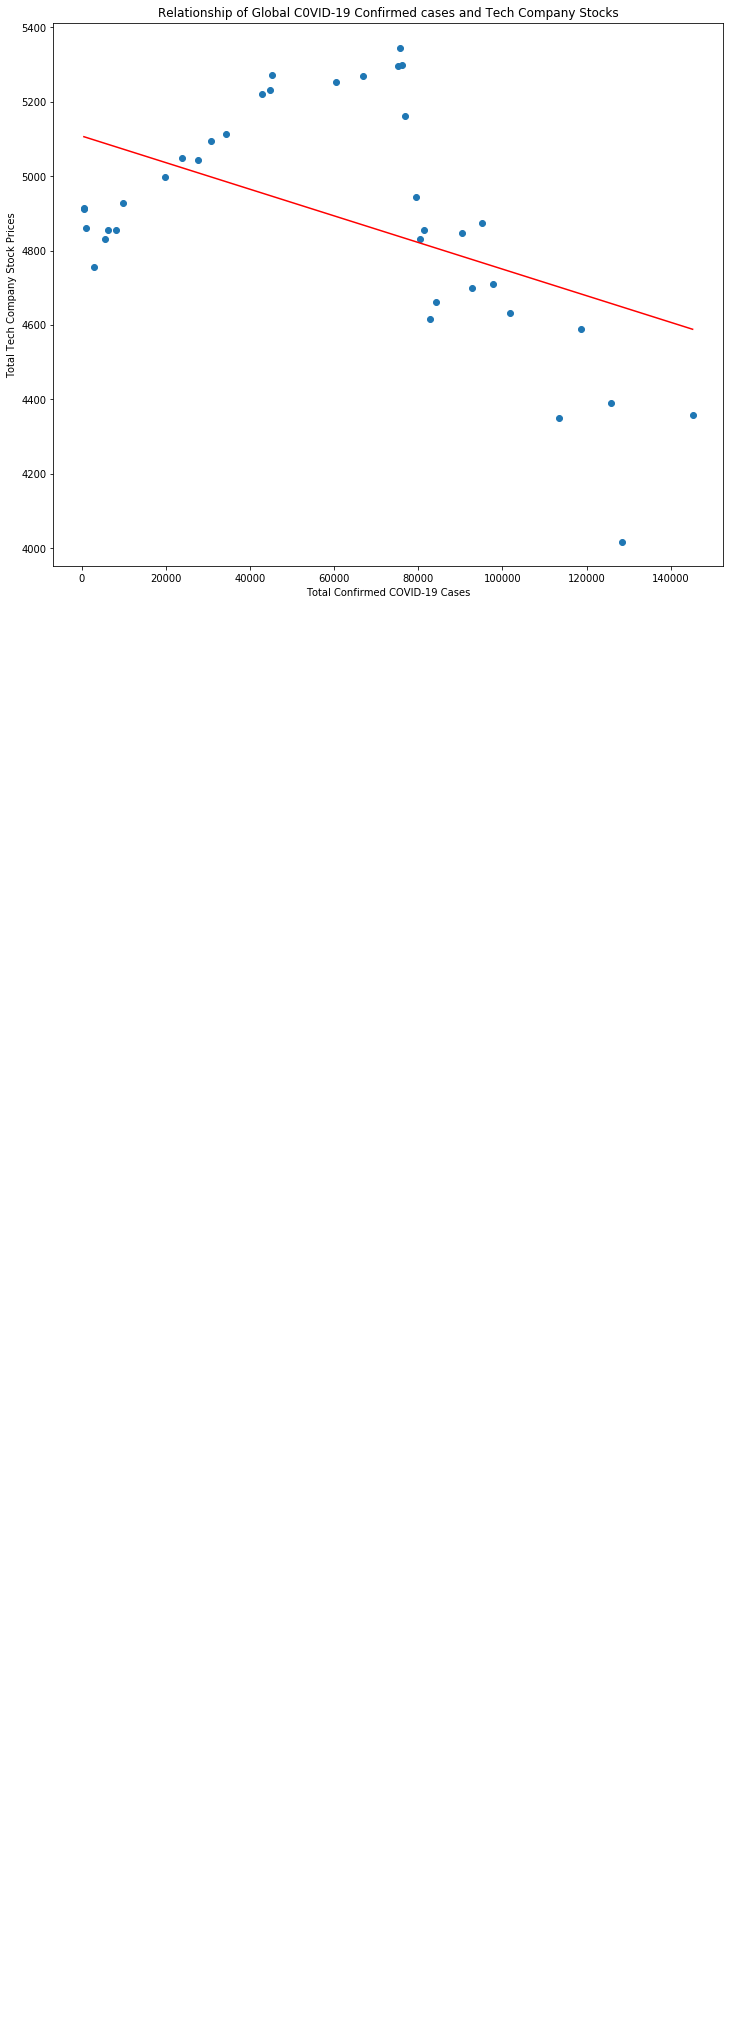

In [58]:
#Generating the scatter and regression line

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(12, 10))

plt.scatter(x,y)

plt.xlabel('Total Confirmed COVID-19 Cases')
plt.ylabel('Total Tech Company Stock Prices')
plt.title('Relationship of Global C0VID-19 Confirmed cases and Tech Company Stocks')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
